# Pandas and `datetime`

![](dtime.jpg)

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Dates as types

<center>
    <img src = kick.jpg width = 500 height = 300 />
    </center>

In [3]:
kickstart = pd.read_csv('data/kickstart2018.csv')

In [4]:
kickstart.head(2)

,Unnamed: 0,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,186228,1947961225,Brass ~ An Industrial Revolution,Tabletop Games,Games,CAD,2017-05-12,80000.0,2017-04-17 17:59:17,1718708.0,successful,13699,CA,99129.09,1251061.29,58232.64
1,161213,1820021233,Ontario: A Photographic Essay (Canceled),Public Art,Art,CAD,2015-07-26,5000.0,2015-05-27 01:09:04,0.0,canceled,0,CA,0.00,0.00,3832.00


In [5]:
kickstart[['launched', 'deadline']].info() # you want these objects created as dates

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18933 entries, 0 to 18932
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   launched  18933 non-null  object
 1   deadline  18933 non-null  object
dtypes: object(2)
memory usage: 296.0+ KB


In [6]:
#convert objects using to_datetime
kickstart['launched'] = pd.to_datetime(kickstart['launched'])
kickstart['deadline'] = pd.to_datetime(kickstart['deadline'])

In [8]:
kickstart[['launched', 'deadline']].info() #notice conversion to datetime64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18933 entries, 0 to 18932
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   launched  18933 non-null  datetime64[ns]
 1   deadline  18933 non-null  datetime64[ns]
dtypes: datetime64[ns](2)
memory usage: 296.0 KB


### Using `datetime` objects

In [10]:
time_1 = kickstart.loc[4, 'launched'] #selecting 4th row of launch

In [11]:
time_1

Timestamp('2017-02-24 20:49:52')

In [12]:
time_1.hour

20

In [13]:
time_1.year

2017

### Building Features with date attributes

In [14]:
kickstart['month_launched'] = kickstart['launched'].dt.month #creates new feature
kickstart['month_due'] = kickstart['deadline'].dt.month #creates new month_due feature

## Time Series

> *A time series is a series of data points indexed (or listed or graphed) in time order. Most commonly, a time series is a sequence taken at successive equally spaced points in time. Thus it is a sequence of discrete-time data. Examples of time series are heights of ocean tides, counts of sunspots, and the daily closing value of the Dow Jones Industrial Average.* -- [Wikipedia](https://en.wikipedia.org/wiki/Time_series)

In [15]:
ge = pd.read_csv('data/GE.csv')

In [16]:
ge.head(2)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-08,25.134615,25.259615,25.057692,25.076923,21.216505,21194800
1,2014-09-09,25.067308,25.105770,24.855770,24.903847,21.070070,22533000


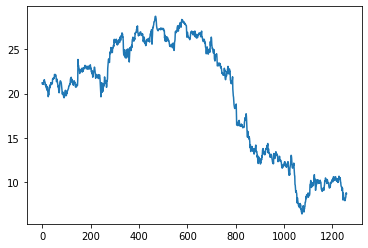

In [17]:
ge['Adj Close'].plot()

## `.to_datetime()`

In [18]:
ge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1259 non-null   object 
 1   Open       1259 non-null   float64
 2   High       1259 non-null   float64
 3   Low        1259 non-null   float64
 4   Close      1259 non-null   float64
 5   Adj Close  1259 non-null   float64
 6   Volume     1259 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 69.0+ KB


In [19]:
ge['Date'] = pd.to_datetime(ge.Date) # mod Date from object to datetime64

In [20]:
ge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1259 non-null   datetime64[ns]
 1   Open       1259 non-null   float64       
 2   High       1259 non-null   float64       
 3   Low        1259 non-null   float64       
 4   Close      1259 non-null   float64       
 5   Adj Close  1259 non-null   float64       
 6   Volume     1259 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 69.0 KB


## Reset the index

In [21]:
ge.set_index('Date', inplace = True) # sets 'Date' as the index of the df
ge.head(2)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-08,25.134615,25.259615,25.057692,25.076923,21.216505,21194800
2014-09-09,25.067308,25.105770,24.855770,24.903847,21.070070,22533000


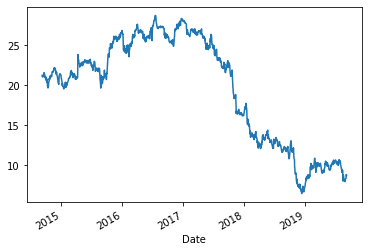

In [23]:
ge['Adj Close'].plot() # now you can see 'Date' along the x-axis

## `resample`

Convenience method for frequency conversion and resampling of time series.  -- [Pandas Documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.resample.html)



In [20]:
ge.resample('W')['Volume'].sum().head() #similar to groupby, but resample 
# uses 'Date and time', ('W') is the grouping by week ['volume'] is the feature
# associated w/ the date

Date
2014-09-14    112675600
2014-09-21    147976500
2014-09-28    143903400
2014-10-05    170338100
2014-10-12    188495600
Freq: W-SUN, Name: Volume, dtype: int64

In [21]:
ge.resample('Q')['Adj Close'].mean().head() #Q is quarter

Date
2014-09-30    21.199991
2014-12-31    21.086287
2015-03-31    20.679128
2015-06-30    22.668241
2015-09-30    21.613560
Freq: Q-DEC, Name: Adj Close, dtype: float64